# Andrederiverttesten

Vi kommer nå til å snakke om lokale ekstremalpunkter for funksjoner av
flere variable. Vi skal se på en test som kan brukes for å avgjøre om et
punkt er et lokalt minimum eller maksimum for en funksjon av flere
variable.

Før vi kommer så langt, må jeg forklare hva jeg mener med et lokalt
minimum og maksimum. La $f \colon \mathbb{R}^n \to \mathbb{R}$ være en
funksjon og la $\mathbf{x}_0 \in \mathbb{R}^n$ være et punkt. Vi sier at
$f$ har et lokalt minimum i $\mathbf{x}_0 \in \mathbb{R}^n$ dersom det
finnes en omegn $U$ om $x_0$ slik at
$f(\mathbf{x}) \geq f(\mathbf{x}_0)$ for alle $\mathbf{x}\in U$. At $U$
er en omegn av $\mathbf{x}_0$ betyr at et akseparallelt rektangel med
positive kantlengder sentrert i $\mathbf{x}_0$ er inneholdt i $U$. At
$R$ er et akseparallelt rektangel betyr at $R$ at det finnes punkter
$$\mathbf{a} = \begin{bmatrix} a_1 \\ \vdots \\ a_n \end{bmatrix} \quad \text{og} \quad
\mathbf{b} = \begin{bmatrix} b_1 \\ \vdots \\ b_n \end{bmatrix}$$ slik
at
$$R = \{ \mathbf{x}\in \mathbb{R}^n \mid a_i < x_i < b_i \text{ for } i = 1, \ldots, n \}.$$
At $R$ er sentrert i $\mathbf{x}_0$ betyr at
$\mathbf{x}_0 = (\mathbf{b} + \mathbf{a}) / 2$ og at
$\mathbf{x}_0 \in R$.

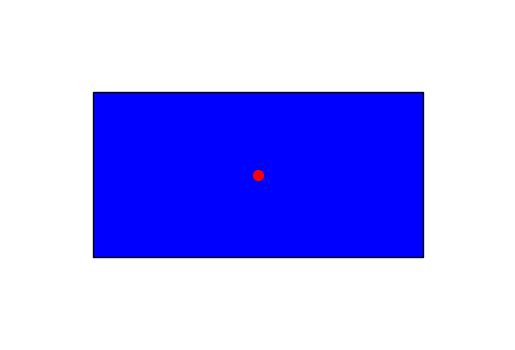

In [1]:
# @title Plot
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches


# Define rectangle parameters
x, y = 1, 1      # Bottom-left corner
width, height = 4, 2

# Create figure and axis
fig, ax = plt.subplots()

# Add filled rectangle
rect = patches.Rectangle((x, y), width, height, facecolor='blue', edgecolor='black')
ax.add_patch(rect)

# Add a dot in the center
center_x = x + width / 2
center_y = y + height / 2
ax.scatter(center_x, center_y, color='red', s=50)  # Red dot

# Remove axis, ticks, and labels
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)
ax.set_xlim(x - 1, x + width + 1)
ax.set_ylim(y - 1, y + height + 1)
ax.set_aspect('equal')
plt.axis('off')  # Completely hide the axis

plt.show()


Vi sier at $f$ har et lokalt maksimum i $\mathbf{x}_0 \in \mathbb{R}^n$
dersom det finnes en omegn $U$ om $x_0$ slik at
$f(\mathbf{x}) \leq f(\mathbf{x}_0)$ for alle $\mathbf{x}\in U$.

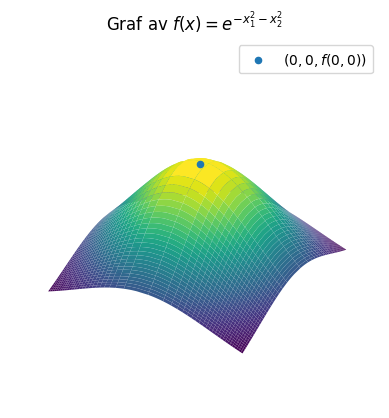

In [2]:
# @title Plotter

def kopier_akse(fig, ax):
    ax2 = fig.add_subplot(1, 1, 1, projection='3d', label="quiver_layer1")
    ax2.patch.set_alpha(0.)
    # Set the same limits and viewing angle for ax2

    ax2.grid(False)  # Remove grid lines
    ax2.xaxis.pane.fill = False  # Hide X pane
    ax2.yaxis.pane.fill = False  # Hide Y pane
    ax2.zaxis.pane.fill = False  # Hide Z pane
    ax2.set_xticks([])  # Remove X ticks
    ax2.set_yticks([])  # Remove Y ticks
    ax2.set_zticks([])  # Remove Z ticks

    # Set the aspect ratio to be equal
    ax2.set_xlim(ax.get_xlim())  # Same x-limits
    ax2.set_ylim(ax.get_ylim())  # Same y-limits
    ax2.set_zlim(ax.get_zlim())  # Same z-limits

    # Ensure the same view angle
    ax2.view_init(elev=ax.elev, azim=ax.azim)  # Copy elevation and azimuthal angles from ax1
    ax2.set_box_aspect(ax.get_box_aspect())
    # Remove background panes (make them fully transparent)
    ax2.xaxis.pane.set_facecolor((1.0, 1.0, 1.0, 0.0))
    ax2.yaxis.pane.set_facecolor((1.0, 1.0, 1.0, 0.0))
    ax2.zaxis.pane.set_facecolor((1.0, 1.0, 1.0, 0.0))

    # Remove pane edges
    ax2.xaxis.pane.set_edgecolor('none')
    ax2.yaxis.pane.set_edgecolor('none')
    ax2.zaxis.pane.set_edgecolor('none')

    # Remove axis lines (works across all Matplotlib versions)
    ax2.xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))  # Invisible
    ax2.yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
    ax2.zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

    # Hide tick labels and grid
    ax2.set_xticks([])
    ax2.set_yticks([])
    ax2.set_zticks([])
    ax2.grid(False)

    # Remove labels (optional)
    ax2.set_xlabel('')
    ax2.set_ylabel('')
    ax2.set_zlabel('')
    return ax2

# Define the function
def f(x):
    x1, x2 = x
    # bemerk at hvis x ikke er i D, da lar vi f være ikke definert, eller nan for not a number
    return np.exp(-x1**2 - x2**2)

# Create a grid of x and y values
x1 = np.linspace(-1, 1, 300)
x2 = np.linspace(-1, 1, 300)
x1 = np.sign(x1) * np.sqrt(np.abs(x1))
x2 = np.sign(x2) * np.sqrt(np.abs(x2))
x = np.meshgrid(x1, x2)

# Compute the function values
x3 = f(x)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(x[0], x[1], x3, cmap='viridis', edgecolor='none', label=r'$f(x)$')

# Plot the contour lines

#plt.text(5, 8, 'hei', fontsize=12)
# Set labels
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')

# Set the aspect ratio to be equal
ax.set_box_aspect([2, 2, 1])
# Remove background panes (make them fully transparent)
ax.xaxis.pane.set_facecolor((1.0, 1.0, 1.0, 0.0))
ax.yaxis.pane.set_facecolor((1.0, 1.0, 1.0, 0.0))
ax.zaxis.pane.set_facecolor((1.0, 1.0, 1.0, 0.0))

# Remove pane edges
ax.xaxis.pane.set_edgecolor('none')
ax.yaxis.pane.set_edgecolor('none')
ax.zaxis.pane.set_edgecolor('none')

# Remove axis lines (works across all Matplotlib versions)
ax.xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))  # Invisible
ax.yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

# Hide tick labels and grid
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.grid(False)

# Remove labels (optional)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_zlabel('')
ax2 = kopier_akse(fig, ax)
ax2.scatter([0], [0], [1], label=r'$(0, 0, f(0,0))$')
plt.title(r'Graf av $f(x) = e^{-x_1^2 - x_2^2}$')
plt.legend();


Vi har følgende test for å avgjøre om $f$ har et lokalt minimum,
maksimum eller ingen av delene i et punkt $\mathbf{x}_0$:

**Teorem 1** (Andrederiverttesten). La
$f \colon \mathbb{R}^n \to \mathbb{R}$ være en funksjon som er to ganger
deriverbar for alle punkter $\mathbf{x}$ i en omegn om et punkt $\mathbf{x}_0 \in \mathbb{R}^n$. La $H$ være matrisen
$$H = \begin{bmatrix}\frac{\partial^2 f}{\partial x_1 \partial x_1}(\mathbf{x}_0) & \frac{\partial^2 f}{\partial x_2 \partial x_1}(\mathbf{x}_0) & \cdots & \frac{\partial^2 f}{\partial x_n \partial x_1}(\mathbf{x}_0) \\ \frac{\partial^2 f}{\partial x_1 \partial x_2}(\mathbf{x}_0) & \frac{\partial^2 f}{\partial x_2 \partial x_2}(\mathbf{x}_0) & \cdots & \frac{\partial^2 f}{\partial x_n \partial x_2}(\mathbf{x}_0) \\ \vdots & \vdots & \ddots & \vdots \\ \frac{\partial^2 f}{\partial x_1 \partial x_n}(\mathbf{x}_0) & \frac{\partial^2 f}{\partial x_2 \partial x_n}(\mathbf{x}_0) & \cdots & \frac{\partial^2 f}{\partial x_n \partial x_n}(\mathbf{x}_0). \end{bmatrix}$$

Dette er *Hesse-matrisen* til $f$ i punktet
$\mathbf{x}_0$. Anta at $\nabla f(\mathbf{x}_0) = 0$. Da har vi
følgende:

1.  *Hvis alle egenverdiene til $H$ er positive, så har $f$ et lokalt minimum i $\mathbf{x}_0$.*

2.  *Hvis alle egenverdiene til $H$ er negative, så har $f$ et lokalt maksimum i $\mathbf{x}_0$.*

3.  *Hvis $H$ har både positive og negative egenverdier, så har $f$ verken et lokalt minimum eller maksimum i $\mathbf{x}_0$.*

*På den andre siden, hvis $f$ har et lokalt maksimum eller et lokalt
minimum i $\mathbf{x}_0$, så er $\nabla f(\mathbf{x}_0) = 0$.*

Et punkt $\mathbf{x}_0$ med $\nabla f(\mathbf{x}_0) = 0$ kalles et *stasjonært* punkt for $f$.

**Eksempel 2**. La $f \colon \mathbb{R}^2 \to \mathbb{R}$ være gitt ved

$$f(\begin{bmatrix} x_1 \\ x_2 \end{bmatrix}) =
  e^{-(x_1^2 + x_2^2)}.$$ Gradienten til $f$ er
$$\nabla f(\begin{bmatrix} x_1 \\ x_2 \end{bmatrix}) =
  \begin{bmatrix} -2x_1 e^{-(x_1^2 + x_2^2)} \\ -2x_2 e^{-(x_1^2 + x_2^2)} \end{bmatrix}.$$
Hesse matrisen til $f$ er
$$H = \begin{bmatrix}\frac{\partial^2 f}{\partial x_1 \partial x_1} & \frac{\partial^2 f}{\partial x_1 \partial x_2} \\ \frac{\partial^2 f}{\partial x_2 \partial x_1} & \frac{\partial^2 f}{\partial x_2 \partial x_2} \end{bmatrix} = \begin{bmatrix} 2e^{-(x_1^2 + x_2^2)}(2x_1^2 - 1) & 4x_1x_2 e^{-(x_1^2 + x_2^2)} \\ 4x_1x_2 e^{-(x_1^2 + x_2^2)} & 2e^{-(x_1^2 + x_2^2)}(2x_2^2 - 1) \end{bmatrix}.$$
Vi ser at $\nabla f(\mathbf{x}) = 0$ hvis $x_1 = 0$
og $x_2 = 0$, og ellers er $\nabla f(\mathbf{x}) \neq 0$. Hesse-matrisen
i punktet
$\mathbf{x}_0 = \begin{bmatrix}0\\0\end{bmatrix}$ er

$$H = \begin{bmatrix} -2 & 0 \\ 0 & -2\end{bmatrix}.$$
Det vil si at $H$ har kun egenverdien $-2$ som er
negativ. Derfor er punktet $\mathbf{x}_0$ et lokalt maksimum for $f$.
Dessuten har $f$ ingen andre lokale maksima eller minima.

**Forklaring:**
Jeg vil nå å gi en ide om på hvorfor andrederiverttesten
fungerer. La oss si at $\mathbf{x}_0$ er et lokalt maksimum for $f$.
Hvis $\mathbf{r} \colon \mathbb{R}\to \mathbb{R}^n$ er en deriverbar
kurve med $\mathbf{r}(0) = \mathbf{x}_0$, da vet vi fra test for
ekstramalpunkter for deriverbare reelle funksjoner fra MIP kapittel 5
at den deriverte av $f \circ r$ er lik null i $t_0$ siden $f \circ r$ har et lokalt maksimum i $0$. Vi vet altså at
$$(f \circ \mathbf{r})'(0) = \nabla f(\mathbf{x}_0) \cdot \mathbf{r}'(0) = 0.$$
Siden dette er sant for alle deriverbare kurver $\mathbf{r}$ som
passerer gjennom $\mathbf{x}_0$, så må
$$\nabla f(\mathbf{x}_0) \cdot \vec{v} = 0$$ for alle vektorer
$\vec{v} \in \mathbb{R}^n$. Dette betyr at $\nabla f(\mathbf{x}_0) = 0$.
(Hvorfor?)

Diskusjonen over viser at hvis $\mathbf{x}_0$ er et lokalt maksimum for
$f$, så er $\nabla f(\mathbf{x}_0) = 0$.

La meg nå prøve å forklar hvorfor $\mathbf{x}_0$ er et lokalt maksimum
for $f$ hvis både $\nabla f(\mathbf{x}_0) = 0$ og alle egenverdiene til
Hesse-matrisen er negative.

La $\mathbf{r} \colon \mathbb{R}\to \mathbb{R}^n$ være en deriverbar
kurve med $\mathbf{r}(0) = \mathbf{x}_0$ og $\mathbf{r}'(0) \ne 0$. Jeg vil forklare hvorfor $0$ er et lokalt maksimum for funksjonen $f \circ \mathbf{r}$. Opp til noen tekniske problemer gir dette at $\mathbf{x}_0$ er et lokalt maksimum for $f$.

Den andrederiverte av
$f \circ \mathbf{r}$ i $0$ er
$$(f \circ \mathbf{r})''(0) = g'(0)$$ der kjerneregelen gir at
$$g(t) = (f \circ \mathbf{r})'(t) = f'(\mathbf{r}(t)) \cdot \mathbf{r}'(t) =
\nabla f(\mathbf{r}(t)) \cdot \mathbf{r}'(t).$$ Produktregelen gir at
$$g'(t) = (\nabla f \circ \mathbf{r})'(t) \cdot \mathbf{r}'(t) + \nabla f(\mathbf{r}(t)) \cdot \mathbf{r}''(t).$$
Siden $\nabla f(\mathbf{x}_0) = 0$ er
$$g'(0) = (\nabla f \circ \mathbf{r})'(0) \cdot \mathbf{r}'(0) = \mathbf{r}'(0) \cdot(H \cdot \mathbf{r}'(0)),$$
hvor den siste likheten kommer fra definisjonen av Hesse-matrisen. Jeg
hopper over forklaringen av hvorfor dette er sant (Det er enkelt å se!). En annen ting jeg vil
bruke uten å forklare det er at
$$\frac{\partial^2 f}{\partial x_i \partial x_j}(\mathbf{x}_0) = \frac{\partial^2 f}{\partial x_j \partial x_i}(\mathbf{x}_0),$$
og at det gjør at enhver vektor $\vec{v}$ kan skrives som en sum av
egenvektorer til $H$. Skriv nå $\mathbf{r}'(0)$ som en kombinasjon av
egenvektorer til $H$: $$\mathbf{r}'(0) = \sum_{i=1}^n c_i \vec{v}_i$$ som
alle har negative egenverdier $\lambda_i$ og som er ortogonale:
$\vec{v}_i \cdot \vec{v}_j = 0$ for $i \ne j$ og
$\vec{v_i} \cdot \vec{v}_i = 1$ for alle $i$. Da er
$$g'(0) = \mathbf{r}'(0) \cdot (H \cdot \mathbf{r}'(0)) = \sum_{i, j=1}^n
c_i c_j \vec{v}_i \cdot (H \cdot \vec{v}_j) = \sum_{i, j=1}^n c_i c_j \lambda_i \vec{v}_i \cdot
\vec{v}_j = \sum_{i=1}^n c^2_i \lambda_i  < 0.$$ Fra testen for
ekstramalpunkter for reelle funksjoner ser vi at $f \circ
\mathbf{r}$ har et lokalt maksimum i $0$.

**Eksempel 3**. La $A$ være en $m \times n$-matrise, og la
$\vec{\mathbf{b}}$ være en vektor i $\mathbb{R}^m$. Vi ser nå
på problemet å finne en vektor $\vec{\mathbf{x}}$ som minimerer
kvadratsummen av avvikene mellom $A\vec{\mathbf{x}}$ og
$\vec{\mathbf{b}}$. Vi skrev, i Eksempel 18 i avsnittet om deriverte funksjoner,
$S \colon \mathbb{R}^n \to \mathbb{R}$  for vektorfunksjonen
$$S(\vec{\mathbf{x}}) = |A\vec{\mathbf{x}} - \vec{\mathbf{b}}|^2 = (A\vec{\mathbf{x}} - \vec{\mathbf{b}}) \cdot (A\vec{\mathbf{x}} - \vec{\mathbf{b}}).$$
Vi regnet ut at den deriverte til denne funksjonen er
$$S'(\vec{\mathbf{x}}) = 2(\vec{\mathbf{x}}^T
  \cdot A^T \cdot A - \vec{\mathbf{b}}^T \cdot A).$$
For å finne Hesse matrisen deriverer vi vektorfunksjonen $\nabla S$ som er gitt ved formelen
$$\nabla S(\vec{\mathbf{x}}) = 2(A^T \cdot A \cdot \vec{\mathbf{x}}- A^T \cdot \vec{\mathbf{b}}).$$
Siden dette er en affin funksjon er 
$$(\nabla S)'(\vec{\mathbf{x}}) = 2A^T \cdot A \cdot \vec{\mathbf{x}}$$
så Hesse matrisen er $H =  2A^T \cdot A$.
Bemerk at hvis $\vec{\mathbf{v}}$ er en egenvektor for $H$ med egenverdi
$\lambda$ så er $H\vec{\mathbf{v}} = \lambda \vec{\mathbf{v}}$ og derfor
er $H^T \vec{\mathbf{v}} = \lambda \vec{\mathbf{v}}$. Dette gir
$$\lambda |\vec{\mathbf{v}}|^2 = \vec{\mathbf{v}} \cdot \lambda \vec{\mathbf{v}} = 
  \vec{\mathbf{v}} \cdot (H \cdot \vec{\mathbf{v}}) = 2(A \cdot \vec{\mathbf{v}}) \cdot
  (A \cdot \vec{\mathbf{v}}) = 2|A \cdot \vec{\mathbf{v}}|^2 \ge 0.$$

Her kan vi lese av at $\lambda \ge 0$, så $S$ har ingen minimumspunkt.
For å finne maksimumspunkt til $S$ må finne kritiske punkter. 
Det vil si punkter der
$\nabla S(\vec{\mathbf{x}}) = 0$. Dette gir oss likningen
$$2(A^T \cdot A \cdot \vec{\mathbf{x}}- A^T \cdot \vec{\mathbf{b}}) = 0.$$
Dette kan også skrives:
$$A^T \cdot A \cdot \vec{\mathbf{x}} = A^T \cdot \vec{\mathbf{b}}.$$
Dette er et vanlig lineært likningssystem, og vi kan løse det ved å
redusere den tilhørende utvidede matrisen.

**Talleksempel**

La oss gi et eksempel med tall:
La
$$A = \begin{bmatrix}1 & 1 \\ 2 & 1 \\ 3 & 1\end{bmatrix} \quad \text{og} \quad
b = \begin{bmatrix}2 \\ 3 \\ 4\end{bmatrix}.$$ Vi kan regne ut at
$A^T \cdot A = \begin{bmatrix}14 & 6 \\ 6 & 3\end{bmatrix}$ og at
$A^T \cdot b = \begin{bmatrix}20 \\ 9\end{bmatrix}$. Derfor kan
$\nabla S(\vec{\mathbf{x}}) = 2(A^T \cdot A \cdot \vec{\mathbf{x}} - A^T \cdot b)$
skrives
$$\nabla S(\vec{\mathbf{x}}) = 2\begin{bmatrix}14 & 6 \\ 6 & 3\end{bmatrix} \begin{bmatrix}x_1 \\ x_2\end{bmatrix} -
2\begin{bmatrix}20 \\ 9\end{bmatrix} = 2\begin{bmatrix}14x_1 + 6x_2 - 20 \\ 6x_1 + 3x_2 - 9\end{bmatrix}.$$

In [3]:
A = np.array([
    [1, 1],
    [2, 1],
    [3, 1]
])

b = np.array([
    [2],
    [3],
    [4]
])

y = b

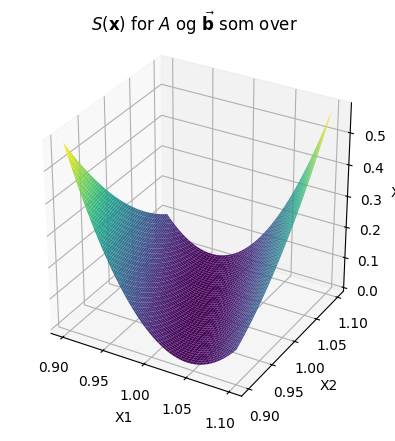

In [4]:
# @title Plotter
# Define the function
def S_fra_A_og_y(A, y):
    ATA = A.T@A
    ATy = A.T@y
    yy = np.sum(y*y)
    def f(x):
        z = np.vstack((x[0].reshape(1, x[0].size), x[1].reshape(1, x[1].size)))
        r1 = np.sum(z * (ATA @ z), axis=0)
        r2 = -2 * np.sum(z * ATy, axis=0)
        r3 = yy
        return 2*(r1 + r2 + r3).reshape(x[0].shape)
    return f

# Create a grid of x and y values
x1 = np.linspace(0.9, 1.1, 300)
x2 = np.linspace(0.9, 1.1, 300)
x = np.meshgrid(x1, x2)

# Compute the function values
S = S_fra_A_og_y(A, y)
x3 = S(x)

# # Mask values outside the unit disc
# mask = x**2 + y**2 > 1  # Create a boolean mask for points outside the unit disc
# z[mask] = np.nan  # Set values outside the unit disc to NaN (they won't be plotted)
# x3[x3>.01]=np.nan

# Create a 3D plotc
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(x[0], x[1], x3, cmap='viridis', edgecolor='none')
plt.title(r'$S(\mathbf{x})$ for $A$ og $\vec{\mathbf{b}}$ som over')

# Set labels
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')

# Set the aspect ratio to be equal
ax.set_box_aspect([1, 1, 1])

### Gradient descent

Vi har allerede løst oppgaven under.

**Oppgave 4**. La $f \colon \mathbb{R}^2 \to \mathbb{R}$ være deriverbar
og la $\mathbf{y}\colon \mathbb{R}\to \mathbb{R}^2$ være en deriverbar
kurve slik at $\mathbf{y}'(t) = -\nabla f(\mathbf{y}(t))$. Forklar
hvorfor funksjonen $f(\mathbf{y}(t))$ ikke er voksende rundt noen
$t \in \mathbb{R}$.

**Strategi:** Hvis $\mathbf{y}$ er som i oppgaven ovenfor, og nærmer $\mathbf{y}(t)$ seg et punkt $\mathbf{x}_0$ når $t$ blir stor så er kanskje dette punktet et lokalt minimumspunkt for $f$. Mange steder brukes dette til å søke etter lokale minimumspunkter for $f$. Hvis vi klarer å finne et slik punkt $\mathbf{x}_0$ kan vi bruke andrederiverttesten til å prøve å vise at det er et lokalt minimumspunkt.

Hvis vi er gitt et startpunkt $\mathbf{y}_0$ kan vi prøve å finne en løsning til differensialligningen $\mathbf{y}'(t) = -\nabla f(\mathbf{y}(t))$ med startbetingelse 
$\mathbf{y}(0) = \mathbf{y}_0$ og se hvilket punkt $\mathbf{y}(t)$ går mot når $t$ blir stor.

## Eksempel

$f(x) = e^{-x_1^2 - x_2^2}$

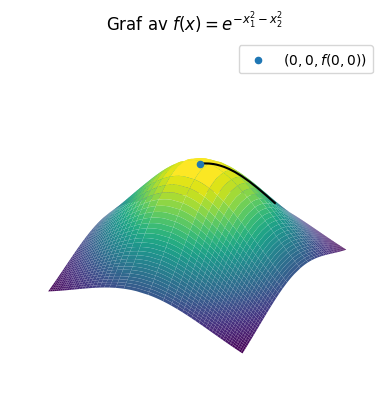

In [5]:
# @title Plotter

from scipy.integrate import solve_ivp
def f(x):
    x1, x2 = x
    # bemerk at hvis x ikke er i D, da lar vi f være ikke definert, eller nan for not a number
    return np.exp(-x1**2 - x2**2)

def gradientf(x1, x2):
    return -2*x1*np.exp(-x1**2 - x2**2), -2*x2*np.exp(-x1**2 - x2**2)

def dy(t, y):
    return gradientf(y[0], y[1])

sol = solve_ivp(dy, t_span=[0, 100], y0=[0.5, 0.5], t_eval=np.linspace(0, 100, 1000))

def kopier_akse(fig, ax):
    ax2 = fig.add_subplot(1, 1, 1, projection='3d', label="quiver_layer1")
    ax2.patch.set_alpha(0.)
    # Set the same limits and viewing angle for ax2

    ax2.grid(False)  # Remove grid lines
    ax2.xaxis.pane.fill = False  # Hide X pane
    ax2.yaxis.pane.fill = False  # Hide Y pane
    ax2.zaxis.pane.fill = False  # Hide Z pane
    ax2.set_xticks([])  # Remove X ticks
    ax2.set_yticks([])  # Remove Y ticks
    ax2.set_zticks([])  # Remove Z ticks

    # Set the aspect ratio to be equal
    ax2.set_xlim(ax.get_xlim())  # Same x-limits
    ax2.set_ylim(ax.get_ylim())  # Same y-limits
    ax2.set_zlim(ax.get_zlim())  # Same z-limits

    # Ensure the same view angle
    ax2.view_init(elev=ax.elev, azim=ax.azim)  # Copy elevation and azimuthal angles from ax1
    ax2.set_box_aspect(ax.get_box_aspect())
    # Remove background panes (make them fully transparent)
    ax2.xaxis.pane.set_facecolor((1.0, 1.0, 1.0, 0.0))
    ax2.yaxis.pane.set_facecolor((1.0, 1.0, 1.0, 0.0))
    ax2.zaxis.pane.set_facecolor((1.0, 1.0, 1.0, 0.0))

    # Remove pane edges
    ax2.xaxis.pane.set_edgecolor('none')
    ax2.yaxis.pane.set_edgecolor('none')
    ax2.zaxis.pane.set_edgecolor('none')

    # Remove axis lines (works across all Matplotlib versions)
    ax2.xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))  # Invisible
    ax2.yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
    ax2.zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

    # Hide tick labels and grid
    ax2.set_xticks([])
    ax2.set_yticks([])
    ax2.set_zticks([])
    ax2.grid(False)

    # Remove labels (optional)
    ax2.set_xlabel('')
    ax2.set_ylabel('')
    ax2.set_zlabel('')
    return ax2

# Create a grid of x and y values
x1 = np.linspace(-1, 1, 300)
x2 = np.linspace(-1, 1, 300)
x1 = np.sign(x1) * np.sqrt(np.abs(x1))
x2 = np.sign(x2) * np.sqrt(np.abs(x2))
x = np.meshgrid(x1, x2)

# Compute the function values
x3 = f(x)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(x[0], x[1], x3, cmap='viridis', edgecolor='none', label=r'$f(x)$')

# Plot the contour lines

#plt.text(5, 8, 'hei', fontsize=12)
# Set labels
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')

# Set the aspect ratio to be equal
ax.set_box_aspect([2, 2, 1])
# Remove background panes (make them fully transparent)
ax.xaxis.pane.set_facecolor((1.0, 1.0, 1.0, 0.0))
ax.yaxis.pane.set_facecolor((1.0, 1.0, 1.0, 0.0))
ax.zaxis.pane.set_facecolor((1.0, 1.0, 1.0, 0.0))

# Remove pane edges
ax.xaxis.pane.set_edgecolor('none')
ax.yaxis.pane.set_edgecolor('none')
ax.zaxis.pane.set_edgecolor('none')

# Remove axis lines (works across all Matplotlib versions)
ax.xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))  # Invisible
ax.yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

# Hide tick labels and grid
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.grid(False)

# Remove labels (optional)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_zlabel('')
ax2 = kopier_akse(fig, ax)
ax2.plot(sol.y[0], sol.y[1], f(sol.y), color='black')
ax2.scatter([0], [0], [1], label=r'$(0, 0, f(0,0))$')
plt.title(r'Graf av $f(x) = e^{-x_1^2 - x_2^2}$')
plt.legend();


In [13]:
# @title Ny f

def f(x):
  x1, x2 = x
  return 2*np.exp(-((x1 + 1)**2 + x2**2)) + np.exp(-((x1 - 2)**2 + (x2 - 0.2)**2))

def gradientf(x):
    x1 = x[0]
    x2 = x[1]
    return (-4*(x1 + 1)*np.exp(-(x1 + 1)**2 - x2**2) - 2*(x1 - 2)*np.exp(-((x1 - 2)**2 + (x2 - 0.2)**2)),
            -4*x2*np.exp(-(x1 + 1)**2 - x2**2) - 2*(x2 - 0.2)*np.exp(-((x1 - 2)**2 + (x2 - 0.2)**2)))

def dy(t, y):
    return gradientf(y)

sol = solve_ivp(dy, t_span=[0, 100], y0=[0.5, 0.5], t_eval=np.linspace(0, 100, 1000))

def kopier_akse(fig, ax):
    subplot_spec = ax.get_subplotspec()

    ax2 = fig.add_subplot(subplot_spec.get_gridspec().nrows, subplot_spec.get_gridspec().ncols, subplot_spec.num1 + 1, projection='3d', label="quiver_layer1")
    ax2.patch.set_alpha(0)
    # Set the same limits and viewing angle for ax2

    ax2.grid(False)  # Remove grid lines
    ax2.xaxis.pane.fill = False  # Hide X pane
    ax2.yaxis.pane.fill = False  # Hide Y pane
    ax2.zaxis.pane.fill = False  # Hide Z pane
    ax2.set_xticks([])  # Remove X ticks
    ax2.set_yticks([])  # Remove Y ticks
    ax2.set_zticks([])  # Remove Z ticks

    # Set the aspect ratio to be equal
    ax2.set_xlim(ax.get_xlim())  # Same x-limits
    ax2.set_ylim(ax.get_ylim())  # Same y-limits
    ax2.set_zlim(ax.get_zlim())  # Same z-limits

    # Ensure the same view angle
    ax2.view_init(elev=ax.elev, azim=ax.azim)  # Copy elevation and azimuthal angles from ax1
    ax2.set_box_aspect(ax.get_box_aspect())
    return ax2

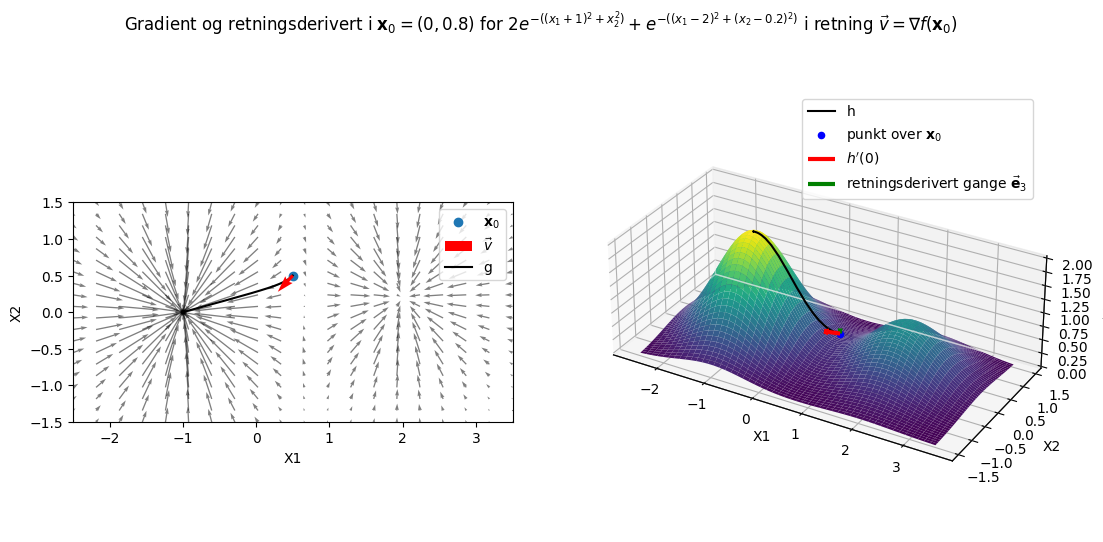

In [23]:
# @title Plotter
# Create a grid of x and y values
x1 = np.linspace(-2.5, 3.5, 300)
x2 = np.linspace(-1.5, 1.5, 300)
xx = np.meshgrid(x1, x2)
x0 = sol.y[:, [0]]
t = np.linspace(-1, 1, 100)

v = gradientf(x0)
g = x0 + v * t[None, :]

# Compute the function values
x3 = f(xx)

fig = plt.figure(figsize=1.3*plt.figaspect(0.5))
fig.suptitle(r"Gradient og retningsderivert i $\mathbf{x}_0 = (0,0.8)$ for $2e^{-((x_1 + 1)^2 + x_2^2)} + e^{-((x_1 - 2)^2 + (x_2-0.2)^2)}$ i retning $\vec v = \nabla f(\mathbf{x}_0)$")

# First subplot (left)
ax = fig.add_subplot(1, 2, 1)  # Change to (1, 2, 1)

n_grid = 20


# Definerer x- og y-verdiene

x = np.linspace(-2.5, 3.5, n_grid)
y = np.linspace(-1.5, 1.5, n_grid)

# Finner retning av piler
X, Y = np.meshgrid(x, y)
dX, dY = gradientf(np.vstack([X.ravel(),Y.ravel()]))
dX = dX.reshape(X.shape)
dY = dY.reshape(Y.shape)
#dX = np.sign(dX)*np.abs(dX)**0.3
#dY = np.sign(dY)*np.abs(dY)**0.3

ax.quiver(X, Y, dX, dY, scale=3, scale_units='x', color='black', angles='xy', alpha=0.5)
ax.scatter(*x0, label=r"$\mathbf{x}_0$")
ax.quiver(x0[0], x0[1], v[0], v[1],
          scale=1, scale_units='x',
        color = 'red', alpha = 1, lw = 3, label=r"$\vec v$", zorder=3)
ax.plot(*sol.y, zorder=2, color='black', label=r'$\mathbf{y}(t)$')
# Set labels
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_xlim([-2.5,3.5])
ax.set_ylim([-1.5,1.5])
ax.set_aspect(1)
plt.legend()

ax = fig.add_subplot(1, 2, 2, projection='3d')

ax.plot_surface(xx[0], xx[1], x3, cmap='viridis', edgecolor='none', alpha=1)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
ax.set_box_aspect([6, 3, 2])

ax2 = kopier_akse(fig, ax)
ax2.plot(sol.y[0], sol.y[1], f(sol.y), color='black', label='h')
ax2.scatter(x0[0], x0[1], f(x0), color='blue', label=r'punkt over $\mathbf{x}_0$')
ax2.quiver(x0[0], x0[1], f(x0), v[0], v[1], np.sum(np.array(gradientf(x0))*np.array(v)),
        color = 'red', alpha = 1, lw = 3, label="$h'(0)$"); # Set labels
ax2.quiver(x0[0], x0[1], f(x0), 0, 0, np.sum(np.array(gradientf(x0))*np.array(v)),
        color = 'green', alpha = 1, lw = 3, label=r"retningsderivert gange $\vec{\mathbf{e}}_3$"); # Set labels
plt.legend();